# Chapter 2

## tensorflow

#### tf.keras.layers

##### tf.keras.layers.Dense  
dense : 신경망 구조의 가장 기본적인 형태  
$y=f(Wx+b)$  
~~~
# 1. 객체 생성 후 다시 호출하면서 입력값 설정
dense = tf.keras.layers.Dense(...)
output = dense(input)
    
# 2. 객체 생성 시 입력 값 설정
output = tf.keras.Dense(...)(input)
~~~

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
INPUT_SIZE = (20,1)
input = tf.placeholder(tf.float32, shape=INPUT_SIZE)
hidden = tf.keras.layers.Dense(units = 10, activation = tf.nn.sigmoid)(input)
output = tf.keras.layers.Dense(units = 2, activation = tf.nn.sigmoid)(hidden)
# units : 출력 값의 크기
# activation : 활성화 함수

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


##### tf.keras.layers.Dropout

overfitting 발생 시, 정규화(Regularization)을 통해 해결 => **Dropout**  
~~~
# 1. 객체 생성 후 다시 호출하면서 입력값 설정
dropout = tf.keras.layers.Dropout(...)
output = dropout(input)

# 2. 객체 생성 시 입력 값 설정
output = tf.keras.layers.Dropout(...)(input)
~~~

In [4]:
INPUT_SIZE = (20,1)
input = tf.placeholder(tf.float32, shape=INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.2)(input)
hidden = tf.keras.layers.Dense(units = 10, activation = tf.nn.sigmoid)(dropout)
output = tf.keras.layers.Dense(units = 2, activation = tf.nn.sigmoid)(hidden)
# rate : dropout을 적용할 확률 (0~1 사이의 값)
# 예를 들어, dropout=0.2이면, 전체 입력 값 중 20%를 0으로 만든다

##### tf.keras.layers.Conv1D

**합성곱(Convolution)**

|  | 합성곱의 방향 | 출력값 |
|-----|-----|-----|
| Conv1D | 한 방향(가로) | 1-D Array(vector) |
| Conv2D | 두 방향(가로, 세로) | 2-D Array(matrix) |
| Conv3D | 세 방향(가로, 세로, 높이) | 3-D Array(tensor) |

~~~
# 1. 객체 생성 후 다시 호출하면서 입력값 설정
conv1d = tf.keras.layers.Conv1D(...)
output = conv1d(input)

# 2. 객체 생성 시 입력 값 설정
output = tf.keras.layers.Conv1D(...)(input)
~~~
Conv1D의 필터는 가로에 적용되는 kernel_size만 설정하면 된다.  
그리고 총 몇개의 필터를 사용할지를 filters인자를 통해 정해야 한다.

In [5]:
INPUT_SIZE = (1,28,28)
is_training = True

input = tf.placeholder(tf.float32, shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate=0.2)(input)
conv = tf.keras.layers.Conv1D(filters=10, kernel_size=3, padding='same', activation=tf.nn.relu)(dropout)
# padding="same" : 패딩을 사용해 입력값과 출력값의 가로 크기를 똑같이 만들기

##### tf.keras.layers.MaxPool1D

**Pooling**  
보통 feature map의 크기를 줄이거나 주요한 특징을 뽑아내기 위해 합성곱 이후에 적용되는 기법  
- max pooling : feature map에 대해 최댓값만을 뽑아내는 방식
- average pooling : feature map에 대해 전체 값들을 평균한 값을 뽑는 방식  

~~~
# 1. 객체 생성 후 다시 호출하면서 입력값 설정
max_pool = tf.keras.layers.MaxPool1D(...)
max_pool.apply(input)

# 2. 객체 생성 시 입력 값 설정
max_pool = tf.keras.layers.MaxPool1D(...)(input)
~~~

In [6]:
INPUT_SIZE = (1,28,28)

input = tf.placeholder(tf.float32, shape=INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate=0.2)(input)
conv = tf.keras.layers.Conv1D(filters=10, kernel_size=3, padding='same', activation=tf.nn.relu)(dropout)
max_pool = tf.keras.layers.MaxPool1D(pool_size=3, padding='same')(conv)
flatten = tf.keras.layers.Flatten()(max_pool)
hidden = tf.keras.layers.Dense(units=50, activation=tf.nn.relu)(flatten)
output = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)(hidden)
# Flatten : Max Pooling 결과값을 완전 연결 계층으로 연결하기 위해서는 행렬 -> 벡터로 만들어야함.
# pool_size : pooling을 적용할 filter size, 정수값

#### tf.data

In [7]:
import os
import numpy as np
from tensorflow.keras import preprocessing

In [8]:
samples = ['너 오늘 이뻐 보인다', 
           '나는 오늘 기분이 더러워', 
           '끝내주는데, 좋은 일이 있나봐', 
           '나 좋은 일이 생겼어', 
           '아 오늘 진짜 짜증나', 
           '환상적인데, 정말 좋은거 같아']

label = [[1], [0], [1], [1], [0], [1]]
# label은 임의 설정

In [9]:
#텍스트 데이터를 수치화 함
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index = tokenizer.word_index

In [10]:
print('수치화된 텍스트 데이터: \n', sequences)
print("각 단어의 인덱스: \n", word_index)
print('label: ',label)

수치화된 텍스트 데이터: 
 [[4, 1, 5, 6], [7, 1, 8, 9], [10, 2, 3, 11], [12, 2, 3, 13], [14, 1, 15, 16], [17, 18, 19, 20]]
각 단어의 인덱스: 
 {'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}
label:  [[1], [0], [1], [1], [0], [1]]


In [11]:
dataset = tf.data.Dataset.from_tensor_slices((sequences, label))
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()
# tf.data.Dataset.from_tensor_slices : sequences와 label을 묶어서 조각으로 만들고 함께 사용할 수 있도록
# make_one_shot_iterator() : 데이터를 하나씩 사용할 수 있게 해줌
# get_next() : 데이터가 하나씩 나오게 되는 구조

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [12]:
with tf.Session() as sess:
    while True:
        try:
            print(sess.run(next_data))
        except tf.errors.OutOfRangeError:
            break

(array([4, 1, 5, 6], dtype=int32), array([1], dtype=int32))
(array([7, 1, 8, 9], dtype=int32), array([0], dtype=int32))
(array([10,  2,  3, 11], dtype=int32), array([1], dtype=int32))
(array([12,  2,  3, 13], dtype=int32), array([1], dtype=int32))
(array([14,  1, 15, 16], dtype=int32), array([0], dtype=int32))
(array([17, 18, 19, 20], dtype=int32), array([1], dtype=int32))


In [13]:
# 데이터 2개씩
BATCH_SIZE = 2

dataset = tf.data.Dataset.from_tensor_slices((sequences, label))
dataset = dataset.batch(BATCH_SIZE)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

with tf.Session() as sess:
    while True:
        try:
            print(sess.run(next_data))
        except tf.errors.OutOfRangeError:
            break

(array([[4, 1, 5, 6],
       [7, 1, 8, 9]], dtype=int32), array([[1],
       [0]], dtype=int32))
(array([[10,  2,  3, 11],
       [12,  2,  3, 13]], dtype=int32), array([[1],
       [1]], dtype=int32))
(array([[14,  1, 15, 16],
       [17, 18, 19, 20]], dtype=int32), array([[0],
       [1]], dtype=int32))


In [14]:
dataset = tf.data.Dataset.from_tensor_slices((sequences, label))
dataset = dataset.shuffle(len(sequences)) #shuffle은 이후 모델의 성능에 크게 기여할 수 있기 때문에 매우 중요하다
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

with tf.Session() as sess:
    while True:
        try:
            print(sess.run(next_data))
        except tf.errors.OutOfRangeError:
            break

(array([12,  2,  3, 13], dtype=int32), array([1], dtype=int32))
(array([4, 1, 5, 6], dtype=int32), array([1], dtype=int32))
(array([7, 1, 8, 9], dtype=int32), array([0], dtype=int32))
(array([14,  1, 15, 16], dtype=int32), array([0], dtype=int32))
(array([10,  2,  3, 11], dtype=int32), array([1], dtype=int32))
(array([17, 18, 19, 20], dtype=int32), array([1], dtype=int32))


In [15]:
# 반복해서 불러오도록
EPOCH = 2

dataset = tf.data.Dataset.from_tensor_slices((sequences, label))
dataset = dataset.repeat(EPOCH)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

with tf.Session() as sess:
    while True:
        try:
            print(sess.run(next_data))
        except tf.errors.OutOfRangeError:
            break

(array([4, 1, 5, 6], dtype=int32), array([1], dtype=int32))
(array([7, 1, 8, 9], dtype=int32), array([0], dtype=int32))
(array([10,  2,  3, 11], dtype=int32), array([1], dtype=int32))
(array([12,  2,  3, 13], dtype=int32), array([1], dtype=int32))
(array([14,  1, 15, 16], dtype=int32), array([0], dtype=int32))
(array([17, 18, 19, 20], dtype=int32), array([1], dtype=int32))
(array([4, 1, 5, 6], dtype=int32), array([1], dtype=int32))
(array([7, 1, 8, 9], dtype=int32), array([0], dtype=int32))
(array([10,  2,  3, 11], dtype=int32), array([1], dtype=int32))
(array([12,  2,  3, 13], dtype=int32), array([1], dtype=int32))
(array([14,  1, 15, 16], dtype=int32), array([0], dtype=int32))
(array([17, 18, 19, 20], dtype=int32), array([1], dtype=int32))


In [16]:
#mapping : 라벨을 제외한 나머지 데이터를 하나의 입력값으로 묶기 위해
def mapping_fn(X, Y=None):
    input = {'x': X}
    label = Y
    return input, label

"""
만약 두 개 이상의 입력값이 존재한다면,
def mapping_fn(X1, X2, Y=None):
    input={'x1':X1, 'x2':X2}
    label = Y
    return input, label
"""

dataset = tf.data.Dataset.from_tensor_slices((sequences, label))
dataset = dataset.map(mapping_fn)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

with tf.Session() as sess:
    while True:
        try:
            print(sess.run(next_data))
        except tf.errors.OutOfRangeError:
            break
# 입력데이터가 'x'라는 키 값을 가지고 있는 dictionary구조

({'x': array([4, 1, 5, 6], dtype=int32)}, array([1], dtype=int32))
({'x': array([7, 1, 8, 9], dtype=int32)}, array([0], dtype=int32))
({'x': array([10,  2,  3, 11], dtype=int32)}, array([1], dtype=int32))
({'x': array([12,  2,  3, 13], dtype=int32)}, array([1], dtype=int32))
({'x': array([14,  1, 15, 16], dtype=int32)}, array([0], dtype=int32))
({'x': array([17, 18, 19, 20], dtype=int32)}, array([1], dtype=int32))


In [17]:
BATCH_SIZE = 2
EPOCH = 2

def mapping_fn(X, Y=None):
    input = {'x': X}
    label = Y
    return input, label

dataset = tf.data.Dataset.from_tensor_slices((sequences, label))
dataset = dataset.map(mapping_fn)
dataset = dataset.shuffle(len(sequences))
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.repeat(EPOCH)
iterator = dataset.make_one_shot_iterator()
next_data = iterator.get_next()

with tf.Session() as sess:
    while True:
        try:
            print(sess.run(next_data))
        except tf.errors.OutOfRangeError:
            break

({'x': array([[ 4,  1,  5,  6],
       [12,  2,  3, 13]], dtype=int32)}, array([[1],
       [1]], dtype=int32))
({'x': array([[17, 18, 19, 20],
       [ 7,  1,  8,  9]], dtype=int32)}, array([[1],
       [0]], dtype=int32))
({'x': array([[10,  2,  3, 11],
       [14,  1, 15, 16]], dtype=int32)}, array([[1],
       [0]], dtype=int32))
({'x': array([[ 7,  1,  8,  9],
       [10,  2,  3, 11]], dtype=int32)}, array([[0],
       [1]], dtype=int32))
({'x': array([[17, 18, 19, 20],
       [ 4,  1,  5,  6]], dtype=int32)}, array([[1],
       [1]], dtype=int32))
({'x': array([[12,  2,  3, 13],
       [14,  1, 15, 16]], dtype=int32)}, array([[1],
       [0]], dtype=int32))


#### Estimator

모델 구현 외,  
- 학습(Train),   
- 검증(Evaluate),  
- 예측(Predict),   
- 배포(Export)  
~~~
def model_fn(features, labels, mode, params, config):

    #모델 구현 부분
    
    return tf.estimator.EstimatorSpec(...)
~~~

인자  
- features : 모델에 적용되는 입력값, 하나의 텐서 자료형(tf.Tensor) 혹은 dictionary 자료형이어야 한다. 학습, 검증, 예측 과정에 모두 사용
- labels : 모델의 정답 라벨값, 하나의 텐서 자료형(tf.Tensor) 혹은 dictionary 자료형이어야 한다. 예측과정에서는 라벨이 존재하지 않기 때문에 Estimator에서 자동으로 이 값이 들어오지 않는다.
- mode : 현재 모델 함수가 실행된 모드(학습, 검증, 예측)을 의미한다.
- params : 모델에 적용될 부가적인 hyper parameter값, dictionary 자료형이어야 한다.
- config : 모델에 적용할 설정 값

~~~
# 모델 학습
estimator.train(input_fn = ...)

# 학습한 모델 검증
estimator.evaluate(input_fn = ...)

# 학습한 모델을 통한 예측
esitmator.predict(input_fn = ...)

def train_input_fn():

    # 데이터 파이프라인 구현 부분
    
    return features, labels
~~~

In [18]:
samples = ['너 오늘 이뻐 보인다', 
           '나는 오늘 기분이 더러워', 
           '끝내주는데, 좋은 일이 있나봐', 
           '나 좋은 일이 생겼어', 
           '아 오늘 진짜 짜증나', 
           '환상적인데, 정말 좋은거 같아']

labels = [[1], [0], [1], [1], [0], [1]]

In [19]:
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index = tokenizer.word_index

In [20]:
EPOCH = 100

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((sequences, labels))
    dataset = dataset.repeat(EPOCH)
    dataset = dataset.batch(1)
    dataset = dataset.shuffle(len(sequences))
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [22]:
# 모델 함수
VOCAB_SIZE = len(word_index) + 1
EMB_SIZE = 128

def model_fn(features, labels, mode):
    
    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    embed_input = tf.keras.layers.Embedding(VOCAB_SIZE, EMB_SIZE)(features)
    embed_input = tf.reduce_mean(embed_input, axis=1)
    
    hidden_layer = tf.keras.layers.Dense(128, activation=tf.nn.relu)(embed_input)
    output_layer = tf.keras.layers.Dense(1)(hidden_layer)
    output = tf.nn.sigmoid(output_layer)
    
    loss = tf.losses.mean_squared_error(output, labels)
    
    if TRAIN:
        global_step = tf.train.get_global_step()
        train_op = tf.train.AdamOptimizer(1e-3).minimize(loss, global_step)
        
        return tf.estimator.EstimatorSpec(mode=mode, train_op=train_op, loss=loss)

In [23]:
DATA_OUT_PATH = './data_out/'

import os

if not os.path.exists(DATA_OUT_PATH):
    os.makedirs(DATA_OUT_PATH)
    
estimator = tf.estimator.Estimator(model_fn=model_fn, model_dir=DATA_OUT_PATH + 'checkpoint/dnn')
estimator.train(train_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './data_out/checkpoint/dnn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x137b22a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value

----------------------

## scikit-learn

지도학습 : Naive Bayes, Decision Trees, Support Vector Machines 등  
비지도학습 : Clustering, Gaussian mixture models 등  
모델 선택 & 평가 : Cross Validation, Model evaluation  
데이터 변환 : Pipeline, Feature extraction, preprocessing data, dimensionality reduction

In [27]:
import sklearn
sklearn.__version__

'0.21.3'

#### Data  

iris data

In [28]:
from sklearn.datasets import load_iris

In [29]:
iris_dataset = load_iris()
print("iris_dataset key : {}".format(iris_dataset.keys()))

iris_dataset key : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [30]:
# data : 실제 데이터
print(iris_dataset['data'])
print('shape of data : {}'.format(iris_dataset['data'].shape))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [33]:
# feature_names
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [34]:
# target : 각 데이터에 대한 정답, 즉 라벨값을 가지고 있음
# target_names : 각 라벨값이 의미하는 것 (setosa -> 0, versicolor -> 1, virginica -> 2)
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [35]:
# DESCR : Description의 약자로, 해당 데이터에 대한 전체적인 요약 정보
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

데이터 분리

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                                   test_size=0.25, random_state=42)

In [38]:
print("shape of train_input: {}".format(train_input.shape))
print("shape of test_input: {}".format(test_input.shape))
print("shape of train_label: {}".format(train_label.shape))
print("shape of test_label: {}".format(test_label.shape))

shape of train_input: (112, 4)
shape of test_input: (38, 4)
shape of train_label: (112,)
shape of test_label: (38,)


지도학습 : **K-nearest neighbor classifier**
- 데이터에 대한 가정이 없어 단순
- 다목적 분류와 회귀에 좋음
- 높은 메모리 요구
- k값이 커지면 계산이 늦어질 수도
- 관련없는 기능의 데이터의 규모에 민감

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) # k=1

In [45]:
#모델 학습
knn.fit(train_input, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [46]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

In [47]:
knn.predict(new_input)

array([1])

=> versicolor로 예측하고 있다.  

In [48]:
# 평가 데이터로 모델의 성능 측정
predict_label = knn.predict(test_input)
print(predict_label)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [49]:
# 실제 결과와 동일한 것의 개수의 평균
print('test accuracy {:.2f}'.format(np.mean(predict_label == test_label)))

test accuracy 1.00


=> 정확도가 100%

비지도학습 : **K-mean Clustering**

In [51]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3) #k=3 -> 3개의 cluster

In [52]:
k_means.fit(train_input)
#라벨을 필요로 하지 않고, 입력 데이터만을 사용해서 비슷한 데이터끼리 군집을 만들기 때문에 라벨을 넣지 않아도 된다

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
#라벨 확인
k_means.labels_

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2], dtype=int32)

In [54]:
print("0 clster : ", train_label[k_means.labels_ == 0])
print("1 clster : ", train_label[k_means.labels_ == 1])
print("2 clster : ", train_label[k_means.labels_ == 2])

0 clster :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 clster :  [2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 2 1]
2 clster :  [2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2]


=> 0번째 군집은 라벨 0인 데이터가 주로 분포, 1번째 군집은 라벨 1인 데이터가 주로 분포, 2번째 군집은 라벨 2인 데이터가 주로 분포  
-> 결과는 군집화를 할 때마다 바뀜

In [55]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

In [56]:
prediction = k_means.predict(new_input)
print(prediction)

[1]


=> versicolor로 예측

In [57]:
# 성능 측정
predict_cluster = k_means.predict(test_input)
print(predict_cluster)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 1 1
 0]


In [58]:
np_arr = np.array(predict_cluster)
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] = 3,4,5
np_arr[np_arr==3] = 0
np_arr[np_arr==4] = 1
np_arr[np_arr==5] = 2
predict_label = np_arr.tolist()
print(predict_label)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]


In [59]:
print('test accuracy {:.2f}'.format(np.mean(predict_label == test_label)))

test accuracy 0.95


**사이킷런을 이용한 특징 추출**  
- CountVectorizer : 각 텍스트에서 횟수를 기준으로 특징 추출
- TfidfVectorizer : TF-IDF 라는 값을 사용해 텍스트에서 특징 추출
- HashingVectorizer : CountVectorizer와 동일한 방법이지만 텍스트를 처리할 때 해시 함수를 사용해서 실행시간을 크게 줄일 수 있다.

***CountVectorizer***

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

count_vectorizer = CountVectorizer()

In [4]:
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [5]:
sentence = [text_data[0]] #['나는 배가 고프다']
print(count_vectorizer.transform(sentence).toarray())

[[1 0 1 0 0 0 1 0 0 0]]


***TfidfVectorizer***  
- TF(Term Frequency) : 특정 단어가 하나의 데이터 안에서 등장하는 횟수  
- DF(Document Frequency) : 문서 빈도 값, 특정 단어가 여러 데이터에 자주 등장하는지  
- IDF(Inverse Document Frequency) : DF의 역수, 특정 단어가 다른 데이터에 등장하지 않을 수록 값이 커진다.  
- **TF-IDF** : TF와 IDF값을 곱해서 사용하므로 어떤 단어가 해당 문서에 자주 등장하지만 다른 문서에는 많이 없는 단어일수록 높은 값을 가지게 된다.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']
tfidf_vectorizer = TfidfVectorizer()

In [8]:
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [13]:
sentence = [text_data[3]] # ['점심 먹고 공부 해야지']
print(tfidf_vectorizer.transform(sentence).toarray())

[[0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


-----------------

## 자연어 Tokenizing

#### English Tokenizing Library

##### nltk

In [1]:
import nltk
#nltk.download()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jungyoon/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Tokenizing** : 텍스트에 대해 특정 기준 단위로 문장을 나누는 것

In [2]:
# 단어 단위 Tokenizing
from nltk.tokenize import word_tokenize
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."
print(word_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [3]:
# 문장 단위 Tokenizing
from nltk.tokenize import sent_tokenize
paragraph = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."
print(sent_tokenize(paragraph))

['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.']


#### Korean Tokenizing Library

In [4]:
import konlpy

형태소 분석기
- Hannanum
- Kkma
- Komoran
- Mecab
- Okt(Twitter)

In [5]:
from konlpy.tag import Okt

In [7]:
okt = Okt()

<code>okt.morphs()</code> : 텍스트를 **형태소 단위**로 나눈다. 옵션으로는 norm(정규화, normalization)과 stem(어간 추출)이 있다. *norm과 stem의 값은 True or False*   
<code>okt.nouns()</code> : 텍스트에서 **명사**만 뽑아낸다.  
<code>okt.phrases()</code> : 텍스트에서 **어절**을 뽑아낸다.  
<code>okt.pos()</code> : 각 품사를 **tagging**하는 역할을 한다. (tagging : 주어진 텍스트를 형태소 단위로 나누고, 나눠진 각 형태소를 그에 해당하는 품사와 함께 리스트화함)  
*ㄴ>옵션설정 : norm, stem, join함수(True이면 나눠진 형태소와 품사를 '형태소/품사' 형태로 같이 붙여서 리스트화)*

In [8]:
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"
print(okt.morphs(text))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']


In [9]:
print(okt.morphs(text, stem=True)) #형태소 단위로 나눈 후 어간을 추출

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [10]:
print(okt.nouns(text))

['한글', '자연어', '처리', '이제']


In [13]:
print(okt.phrases(text))

['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [14]:
print(okt.pos(text))

[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [16]:
print(okt.pos(text, join=True)) #형태소와 품사를 붙여서 리스트화

['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


KoNLPy 데이터  
- kolaw : 한국 법률 말뭉치, 'constitution.txt'파일로 저장되어 있음
- kobill : 대한민국 국회 의안 말뭉치, 각 id값을 가지는 의안으로 구성돼 있고, 파일은 *'1809890.txt' ~ '1809899.txt'*

In [17]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [18]:
kolaw.open('constitution.txt').read()[:20]

'대한민국헌법\n\n유구한 역사와 전통에 '

In [19]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

-------------------

## 그 밖의 라이브러리(전처리)

### Numpy

In [20]:
import numpy as np
a = np.array([1,2,3])
print(a)

[1 2 3]


배열  
ndarray의 속성
- <code>ndarray.ndim</code> : 배열의 축(차원)의 수를 반환
- <code>ndarray.shape</code> : 배열의 형태를 반환, ex) 2x3 => (2,3)
- <code>ndarray.size</code> : 배열 내 원소의 총 개수를 반환
- <code>ndarray.dtype</code> : 배열 내 원소들의 자료형 반환

In [21]:
a = np.array([[1,2,3],[1,5,9],[3,5,7]])
print(a.ndim)

2


In [22]:
print(a.shape)

(3, 3)


In [23]:
print(a.size)

9


In [24]:
print(a.dtype)

int64


배열 생성
- <code>numpy.zeros</code> : 모든 배열의 원소가 0인 배열 생성
- <code>numpy.ones</code> : 모든 배열의 원소가 1인 배열 생성
- <code>numpy.empty</code> : 배열의 크기만 정해주고 원소는 초기화하지 않은 배열을 생성한다. 원소에는 매우 크거나 작은 값이 들어간다.
- <code>numpy.arange</code> : python의 range함수와 유사한 형태로 배열을 생성, 배열의 원소들이 수열을 구성
- <code>numpy.full</code> : 배열의 모든 값이 하나의 상수인 배열을 생성
- <code>numpy.eye</code> : 지정한 크기의 단위행렬을 생성
- <code>numpy.random.random</code> : 배열의 원소를 임의 값으로 생성, 값은 0~1 사이 값으로 지정

In [25]:
a = np.zeros((2,3)) #원소가 모두 0인 배열 생성
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [27]:
b = np.ones((2,1)) #원소가 모두 1인 배열 생성
print(b)

[[1.]
 [1.]]


In [28]:
c = np.empty((2,2)) #원소값을 초기화하지 않은 배열 생성
print(c)

[[1.28822975e-231 1.28822975e-231]
 [9.88131292e-324 2.78134232e-309]]


In [29]:
d = np.arange(10, 30, 5) # 10부터 30 전까지 5단위로 배열 생성
print(d)

[10 15 20 25]


In [30]:
e = np.full((2,2),4) # 원소가 모두 4인 배열 생성
print(e)

[[4 4]
 [4 4]]


In [31]:
f = np.eye(3) #3x3크기의 단위행렬 생성
print(f)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [32]:
g = np.random.random((2,2)) # 임의값을 가진 배열 생성
print(g)

[[0.86102055 0.17321969]
 [0.9967276  0.12951808]]


Numpy 기본 연산

In [33]:
a = np.array([1,2,3])
b = np.array([10, 20, 30])

In [36]:
print(a+b)
print(np.add(a,b))

[11 22 33]
[11 22 33]


In [37]:
print(b-a)
print(np.subtract(b,a))

[ 9 18 27]
[ 9 18 27]


In [38]:
print(a**2)

[1 4 9]


In [39]:
print(b<15)

[ True False False]


In [40]:
c = np.array([[1,2],[3,4]])
d = np.array([[10,20],[30,10]])
print(c*d) #원소별 곱셈

[[10 40]
 [90 40]]


In [42]:
#내적(dot product)계산
print(np.dot(c,d))
print(c.dot(d))

[[ 70  40]
 [150 100]]
[[ 70  40]
 [150 100]]


In [43]:
a = np.array([[1,2,3,4],[5,6,7,8],[1,3,5,7]])
print(a.sum(axis=0)) # 0축, 즉 열을 기준으로 한 덧셈

[ 7 11 15 19]


In [44]:
print(a.sum(axis=1)) # 1축, 즉 행을 기준으로 한 덧셈

[10 26 16]


In [45]:
print(a.max(axis=1)) # 각 행에서의 최댓값

[4 8 7]


인덱싱(indexing) : 배열에서 특정 원소를 뽑아내는 것  
슬라이싱(slicing) : 배열에서 특정 구간의 값을 뽑아내는 것

In [46]:
a = np.array([1,2,3,4,5,6,7])
print(a[3])

4


In [47]:
print(a[-1])

7


In [48]:
print(a[2:5])

[3 4 5]


In [49]:
print(a[2:])

[3 4 5 6 7]


In [50]:
print(a[:4])

[1 2 3 4]


In [51]:
a = np.array([[1,2,3], [4,5,6,],[7,8,9]])
print(a[1,2])

6


In [52]:
print(a[:,1]) #1열의 모든 원소

[2 5 8]


In [53]:
print(a[-1]) #마지막 행

[7 8 9]


배열 변환  
- <code>ndarray.ravel()</code> : 배열을 1차원 배열로 만든다.
- <code>ndarray.reshape()</code> : 배열의 형태를 바꾼다.
- <code>ndarray.T</code> : transpose된 배열

In [54]:
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a.ravel())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [55]:
print(a.reshape(2,6))

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [56]:
print(a.T)

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [57]:
print(a.reshape(3,-1)) #열만 지정해도 나머지는 자동으로 맞출 수 있음

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


**브로드캐스팅** : 다른 형태의 배열끼리도 연산이 가능하도록

In [58]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,0,1])
y = np.empty_like(a) # 배열 a와 크기가 같은 원소가 비어있는 배열 생성

# 배열 b를 a의 각 행에 더해주기 위해 반복문 선언
for i in range(3):
    y[i,:] = a[i, :] + b

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


In [59]:
#위와 같으나 브로드캐스팅 이용
c = a+b #c를 따로 선언할 필요 없이 만들 수 있다.
print(c)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


### pandas

데이터 구조  
- Series : 1차원 
- DataFrame : 2차원
- Panel : 3차원

In [60]:
import pandas as pd

***Series***  
<code>pandas.Series(data, index, dtype, copy)</code>

In [61]:
a = pd.Series([1,3,5,7,10]) #list를 이용한 Series data 생성
print(a)

0     1
1     3
2     5
3     7
4    10
dtype: int64


In [62]:
data = np.array(['a','b','c','d']) #Numpy 배열 생성
b = pd.Series(data) # Numpy 배열을 이용한 Series data 생성
print(b)

0    a
1    b
2    c
3    d
dtype: object


In [63]:
c = pd.Series(np.arange(10, 30, 5)) # numpy arange 함수로 생성한 배열로 Series 생성
print(c)

0    10
1    15
2    20
3    25
dtype: int64


순서대로 index가 존재하는데, 이 값을 원하는 값으로 바꿔줄 수 있다. python의 dictionary를 활용해 Series를 생성하면, 이 index값은 dictionary의 key값으로 지정된다.

In [64]:
a = pd.Series(['a', 'b', 'c'], index=[10,20,30]) #index직접지정
print(a)

10    a
20    b
30    c
dtype: object


In [65]:
dict = {'a':10, 'b':20, 'c':30} # Python dictionary를 활용한 Series 생성
d = pd.Series(dict) # index -> a, b, c
print(d)

a    10
b    20
c    30
dtype: int64


***DataFrame***  
<code>pandas.DataFrame(data, index, columns, dtype, copy)</code>

In [66]:
a = pd.DataFrame([1,3,5,7,9]) #list
print(a)

   0
0  1
1  3
2  5
3  7
4  9


In [67]:
dict = {'Name' : ['Kim', 'Lee', 'Han'], 'Age' : [22, 23, 22]}
b = pd.DataFrame(dict) #dictionary
print(b)

  Name  Age
0  Kim   22
1  Lee   23
2  Han   22


In [68]:
c = pd.DataFrame([['apple', 7000], ['banana', 5000], ['orange', 4000]]) #리스트의 중첩
print(c)

        0     1
0   apple  7000
1  banana  5000
2  orange  4000


In [69]:
c = pd.DataFrame([['apple', 7000], ['banana', 5000], ['orange', 4000]], columns = ['name', 'price'])
print(c)

     name  price
0   apple   7000
1  banana   5000
2  orange   4000


데이터 불러오기 : <code>pandas.read_csv('file_path')</code>  

In [78]:
df = pd.read_csv('./2.NLP_PREP/data_in/datafile.csv')
print(df)

     Unnamed: 0         A         B    C
0    2018-02-03  0.076547 -0.410959  824
1    2018-02-04  0.810574  0.988997  255
2    2018-02-05  0.071555  0.772209  859
3    2018-02-06  0.319684  0.760100  551
4    2018-02-07  0.571791  0.162974  159
..          ...       ...       ...  ...
295  2018-11-25  0.961260 -0.160928  772
296  2018-11-26  0.412032  0.739386  171
297  2018-11-27  0.934486  0.496985  925
298  2018-11-28  0.072067  0.697545  919
299  2018-11-29  0.705263 -0.866304  146

[300 rows x 4 columns]


In [79]:
print(df['A']) # A열의 데이터만 확인

0      0.076547
1      0.810574
2      0.071555
3      0.319684
4      0.571791
         ...   
295    0.961260
296    0.412032
297    0.934486
298    0.072067
299    0.705263
Name: A, Length: 300, dtype: float64


In [80]:
print(df['A'][:3]) # A열의 데이터 중 앞의 3개만 확인

0    0.076547
1    0.810574
2    0.071555
Name: A, dtype: float64


In [82]:
df['D'] = df['A'] + df['B'] # A열과 B열을 더한 새로운 D열 생성
print(df['D'])

0     -0.334412
1      1.799571
2      0.843764
3      1.079784
4      0.734765
         ...   
295    0.800332
296    1.151419
297    1.431471
298    0.769612
299   -0.161041
Name: D, Length: 300, dtype: float64


<code>describe()</code> : 데이터에 대한 평균, 표준편차 등 다양한 수치 값을 얻을 수 있다.

In [84]:
df.describe()

,A,B,C,D
count,300.000000,300.000000,300.000000,300.000000
mean,0.504467,0.120235,517.743333,0.624702
std,0.283837,0.576256,283.187160,0.656320
min,0.003110,-0.981417,0.000000,-0.890799
25%,0.241881,-0.336614,282.250000,0.100411
50%,0.528009,0.224035,526.500000,0.767702
75%,0.750084,0.591710,754.250000,1.141083
max,0.994491,0.989536,996.000000,1.857518


## Matplotlib

In [85]:
import matplotlib.pyplot as plt

In [86]:
%matplotlib inline

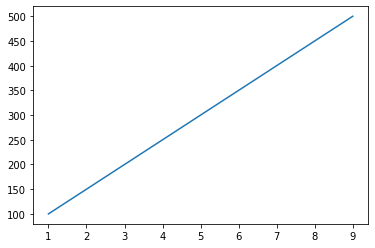

In [87]:
X=[1,3,5,7,9]
Y=[100,200,300,400,500]
plt.plot(X,Y)

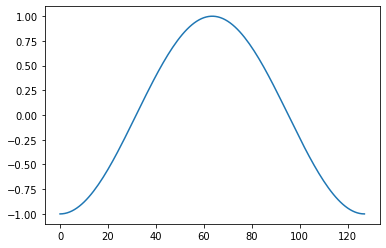

In [88]:
x = np.linspace(-np.pi, np.pi, 128) #연속적인 값을 갖는 배열
y = np.cos(x)
plt.plot(y)

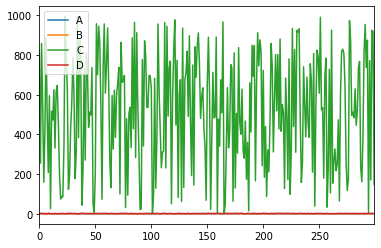

In [89]:
df.plot()

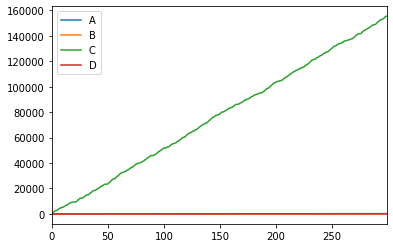

In [90]:
df_sum = df.cumsum() #데이터를 누적값으로 바꿔준다.
df_sum.plot()

## re

정규표현식(Regular Expression) library  

In [91]:
import re

- <code>re.compile(pattern)</code> : 특정 기호를 정규 표현식 객체로 만들어 줌
- <code>re.search(pattern, string)</code> : 해당 문자열에서 정규 표헌식에 해당하는 첫 부분을 찾음
- <code>re.split(pattern, string)</code> : 해당 문자열에서 특정 패턴으로 문자열을 나누어 리스트로 만든다.
- <code>re.sub(pattern, repl, string)</code> : 문자열(string)에서 특정 패턴(pattern)을 만족시키는 문자를 사용자가 정의한 문자(repl)로 치환

In [92]:
pattern = ' \W+'
re_pattern = re.compile(pattern)

In [93]:
re.search("(\w+)", "wow, it is awesome")

<_sre.SRE_Match object; span=(0, 3), match='wow'>

In [94]:
re.split('\W', 'wow, it is world of word')

['wow', '', 'it', 'is', 'world', 'of', 'word']

In [95]:
re.sub("\d", "number", "7 candy")

'number candy'

### Beautiful Soup

주로 웹 크롤링에 사용되는 라이브러리로, HTML문서 혹은 XML문서에서 데이터를 불러오는데 사용  
BS를 이용하면 손쉽게 HTML 태그를 제거할 수 있음

In [97]:
from bs4 import BeautifulSoup

str = '<body> 이 글은 Beautiful Soup 라이브러리를 사용하는 방법에 대한 글입니다. <br> </br> 라이브러리를 사용하면 쉽게 HTML 태그를 제거할 수 있습니다.</body>'

str = BeautifulSoup(str, "html5lib").get_text()

print(str)

 이 글은 Beautiful Soup 라이브러리를 사용하는 방법에 대한 글입니다.   라이브러리를 사용하면 쉽게 HTML 태그를 제거할 수 있습니다.
